In [ ]:
# Cài đặt
# !pip install xgboost
# !pip install imbalanced-learn

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Đọc dữ liệu từ file
customer_data = pd.read_csv("Churn_Modelling.csv")
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


0    7963
1    2037
Name: Exited, dtype: int64


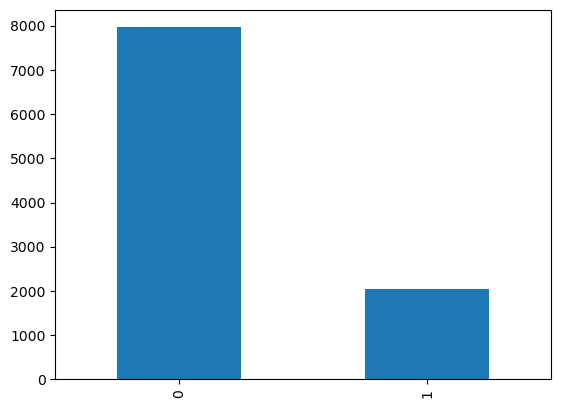

In [3]:
customer_data['Exited'].value_counts().plot(kind="bar");
print(customer_data['Exited'].value_counts())

## TH1: Khi Train model như bình thường

In [4]:
dataset = customer_data.drop(["RowNumber","Surname","CustomerId"], axis=1)

In [5]:
# Tao ra onehot (biến giả)
dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

#Performance evaluation
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

### Train model voi imabalance data
### LogisticRegression

In [6]:
# Khoi tao
model = LogisticRegression() 

# Fit voi du lieu trian
model.fit(X_train, y_train)

# Du doan du lieu test
y_pred = model.predict(X_test)

# in ra ket qua
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



**Nhận xét:**
+ Chỉ có f1-score của lớp 0 là tốt (0.89)
+ Cái cần quan tâm là f1-score của lớp 1, lại rất tệ (0.29)
+ Suy ra, chỉ tốt trên phần dữ liệu lớp 0 (chiếm đa số)

In [7]:
# Khoi tao
model = LogisticRegression(class_weight="balanced") 

# Fit voi du lieu train
model.fit(X_train, y_train)

# Du doan du lieu test
y_pred = model.predict(X_test)

# in ra ket qua
print_scores( y_test, y_pred)


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



**Nhận xét:** Các chỉ số có nâng lên khi tạo `class_weight="balanced"`

### Random Forest

In [8]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Khoi tao model random forest
model_RFC = RandomForestClassifier(n_estimators=200, random_state=42) 

# Fit vao du lieu train
model_RFC.fit(X_train, y_train)

# Du doan 
y_pred = model_RFC.predict(X_test)

# In ket qua
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



### GradientBoosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.01, random_state=42,n_estimators=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



### xgboost

In [10]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)

y_pred = model.predict(X_test)
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [11]:
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## TH2: Khi fix lại dataset 

Có 2 hướng:
+ 1 là giảm số lượng quan sát ở mẫu nhiều (undersampling)
+ 2 là tăng số lượng quan sát ở mẫu ít (oversampling)

## I. Dùng cho class có nhiều data hơn (undersampling)

In [12]:
dataset_0 = dataset[dataset.Exited==0]
dataset_1 = dataset[dataset.Exited==1]
dataset_0.shape, dataset_1.shape

((7963, 11), (2037, 11))

### Cách 1: Tạo ra một dataset mới

In [13]:
# Dùng hàm sample - lấy ngẫu nhiên từ data shape nào đó
dataset_0_rus = dataset_0.sample(dataset_1.shape[0])
dataset_0_rus.shape

(2037, 11)

In [14]:
# Nối rus_0 với dataset_1
dataset_random_under = pd.concat([dataset_0_rus,dataset_1])
dataset_random_under.shape

(4074, 11)

### Training lại model

In [15]:
dataset_dummy = pd.get_dummies(dataset_random_under,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       443
           1       0.70      0.71      0.71       372

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



### Cách  2: Dùng NearMiss

In [16]:
dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

from imblearn.under_sampling import NearMiss
nm = NearMiss()

X_res, y_res = nm.fit_resample(X,y)
X_res.shape, y_res.shape

((4074, 11), (4074,))

### Training lại model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       443
           1       0.96      0.80      0.87       372

    accuracy                           0.89       815
   macro avg       0.90      0.88      0.89       815
weighted avg       0.90      0.89      0.89       815



## II. Dùng cho class có ít data hơn (oversampling)

### Cách 1: Dùng Random Oversampling

In [18]:
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

dataset_dummy = pd.get_dummies(dataset, drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_ros, y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape

((15926, 11), (15926,))

### Training lại model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1633
           1       0.69      0.70      0.70      1553

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



### Cách 2: Dùng SMOTE

In [20]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((15926, 11), (15926,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1633
           1       0.77      0.79      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



## Kết luận:
+ Như vậy, dựa theo các kếtg quả trên, ta thấy cách scaler dữ liệu cho ra kết quả tốt nhất là NearMiss, tiếp theo là SMOTE
+ Tuy nhiên, không có 1 khẳng định nào chứng minh là cách nào tốt hơn cách nào. Do đó, khi sử dụng cần linh hoạt để tìm được kết quả tốt nhất.

**Hướng mở, chia dataset ra train và test. Sau đó, chỉ làm undersampling và oversampling trên train, để nguyên test để kiểm tra.**